In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from NM_classifier import find_nearest_mean
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

/vol/home/s4288351/Documents/Assignment-A0---Group-29---Intro-to-Deep-Learning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


86.35% from the train set is correctly classified using the nearest mean method.
80.40% from the test set is correctly classified using the nearest mean method.


In [6]:
train_in = np.genfromtxt("train_in.csv", delimiter=",")
train_out = np.genfromtxt("train_out.csv", delimiter=",")
test_in = np.genfromtxt("test_in.csv", delimiter=",")
test_out = np.genfromtxt("test_out.csv", delimiter=",")

In [7]:
#Part 1 Problem 1

def dist(x, y):
    z = x - y
    return np.linalg.norm(z)

cloud = []

for i in range(0, 10):
    cloud.append(train_in[np.where(train_out == i)])


center = []
for j in range(0, 10):
    center.append(np.mean(cloud[j], axis=0))

np.savetxt("cloud_centers.csv", center, delimiter=",")

distance = np.zeros((10, 10))
for k in range(0, 10):
    for l in range(0, 10):
        distance[k, l] = dist(center[k], center[l])

print(distance)

[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9.21195402
  10.8882374   0.          8.4677853   5.42647412]
 [ 9.907

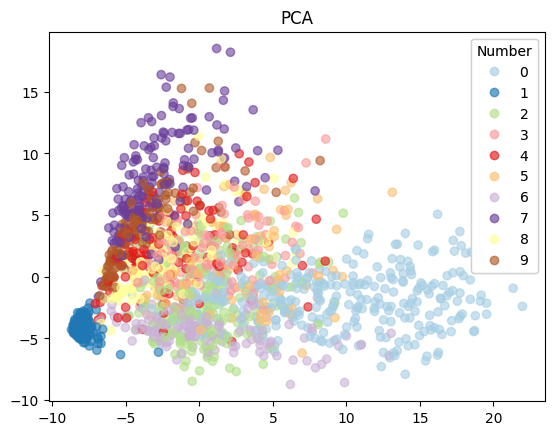

In [10]:
#Part 1 Problem 2 PCA

# Preprocessing recommended by: https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-with-python/
# Based on example in: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

# Preprocessing the scale
sc = StandardScaler()
train_in = sc.fit_transform(train_in)

X_reduced = PCA(n_components=2).fit_transform(train_in)

fig, ax = plt.subplots()

PCA_reduced = ax.scatter(X_reduced[:,0], X_reduced[:,1], c=train_out, alpha=0.6, label=train_out, cmap="Paired")

legend = ax.legend(*PCA_reduced.legend_elements(num=10),
                    loc="upper right", title="Number")
ax.add_artist(legend)

plt.title("PCA")

plt.show()

/vol/home/s4288351/Documents/Assignment-A0---Group-29---Intro-to-Deep-Learning/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


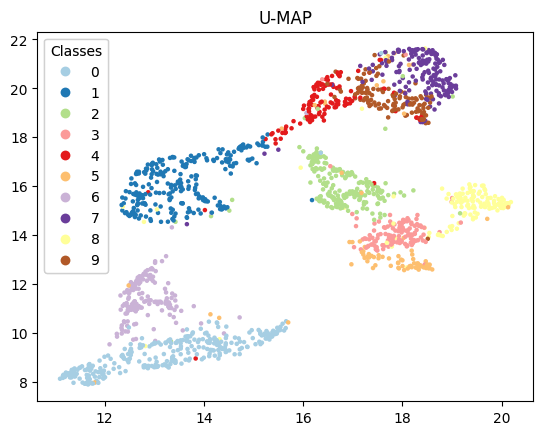

In [11]:
#Part 1 Problem 2 U-MAP

reducer = umap.UMAP()

embedding = reducer.fit_transform(train_in)

fig, ax = plt.subplots()
scatter = ax.scatter(embedding[:, 0],
                     embedding[:, 1],
                     c = train_out,
                     cmap = "Paired",
                     s = 5)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.title("U-MAP")
plt.show()

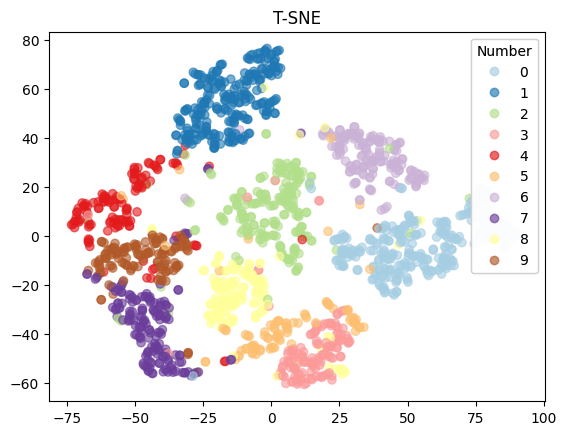

In [12]:
#Part 1 Problem 2 T-SNE

train_in_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=10).fit_transform(train_in)

fig, ax = plt.subplots()

PCA_reduced = ax.scatter(train_in_embedded[:,0], train_in_embedded[:,1], c=train_out, alpha=0.6, label=train_out, cmap="Paired")

legend = ax.legend(*PCA_reduced.legend_elements(num=10),
                    loc="upper right", title="Number")
ax.add_artist(legend)

plt.title("T-SNE")

plt.show()

In [13]:
#Part 1 Problem 3

#same function as dist for 10 vectors simultaneous
def dist_center(x, c):
    vector = np.tile(x, (10, 1))
    res = vector - c
    abs = np.linalg.norm(res, axis=1)
    return np.where(abs == np.min(abs))[0][0] #output only integer where distance is smallest

def find_nearest_mean(X, c):
    nearest_mean = []
    for x in X:
        nearest_mean.append(dist_center(x, c).item())
    return nearest_mean

centers = np.genfromtxt("cloud_centers.csv", delimiter=",")

train_nearest_mean = []
for i in range(len(train_in)):
    train_nearest_mean.append(dist_center(train_in[i], centers).item())

train_correct = np.where(train_nearest_mean == train_out)[0]
train_percentage = 100 * len(train_correct) / len(train_in)
print(f"{train_percentage:.2f}% from the train set is correctly classified using the nearest mean method.")

test_nearest_mean = []
for i in range(len(test_in)):
    test_nearest_mean.append(dist_center(test_in[i], centers).item())

test_correct = np.where(test_nearest_mean == test_out)[0]
test_percentage = 100 * len(test_correct) / len(test_in)
print(f"{test_percentage:.2f}% from the test set is correctly classified using the nearest mean method.")

87.17% from the train set is correctly classified using the nearest mean method.
80.40% from the test set is correctly classified using the nearest mean method.


96.60% from the train set is correctly classified using the K-Nearest-Neighbor method.
90.80% from the test set is correctly classified using the K-Nearest-Neighbor method.


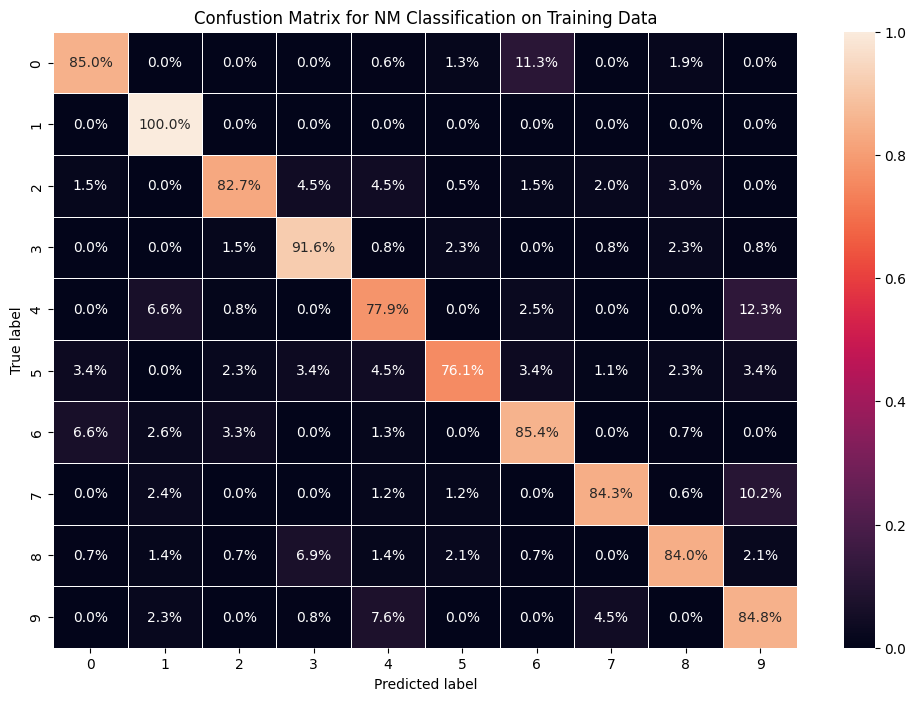

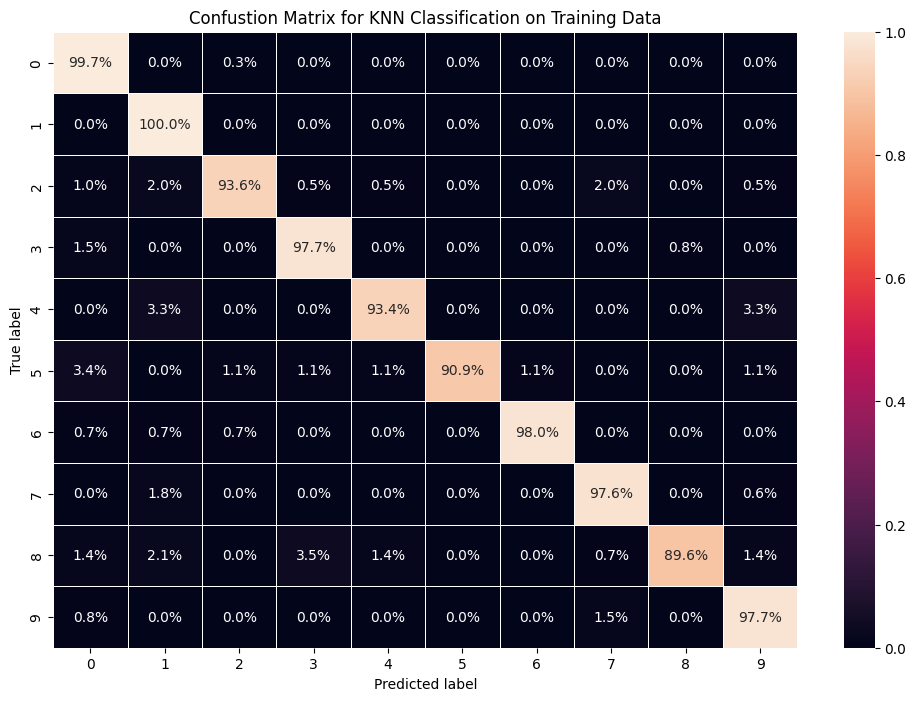

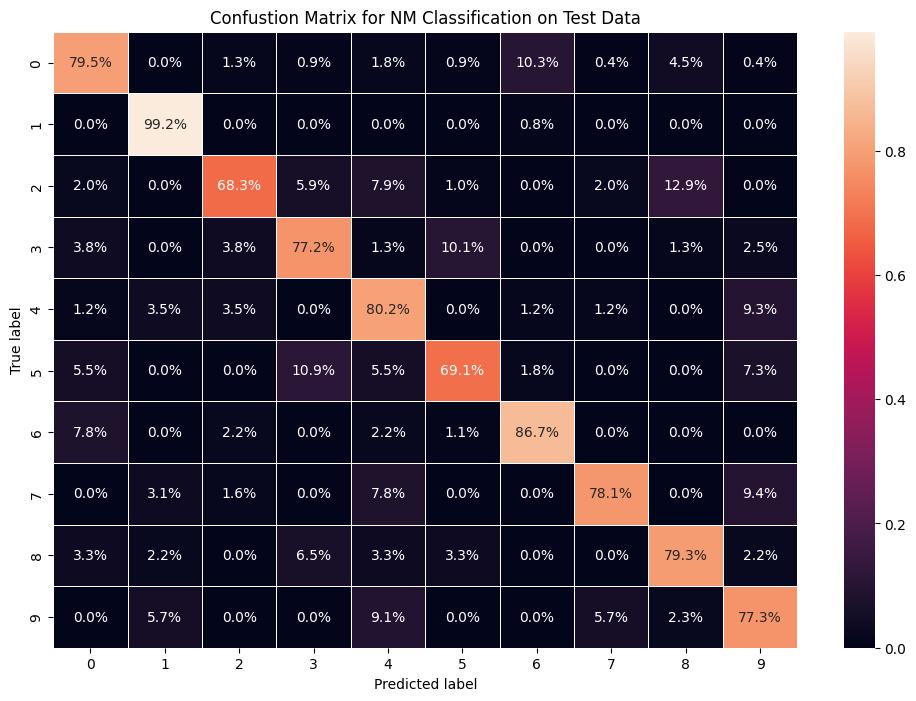

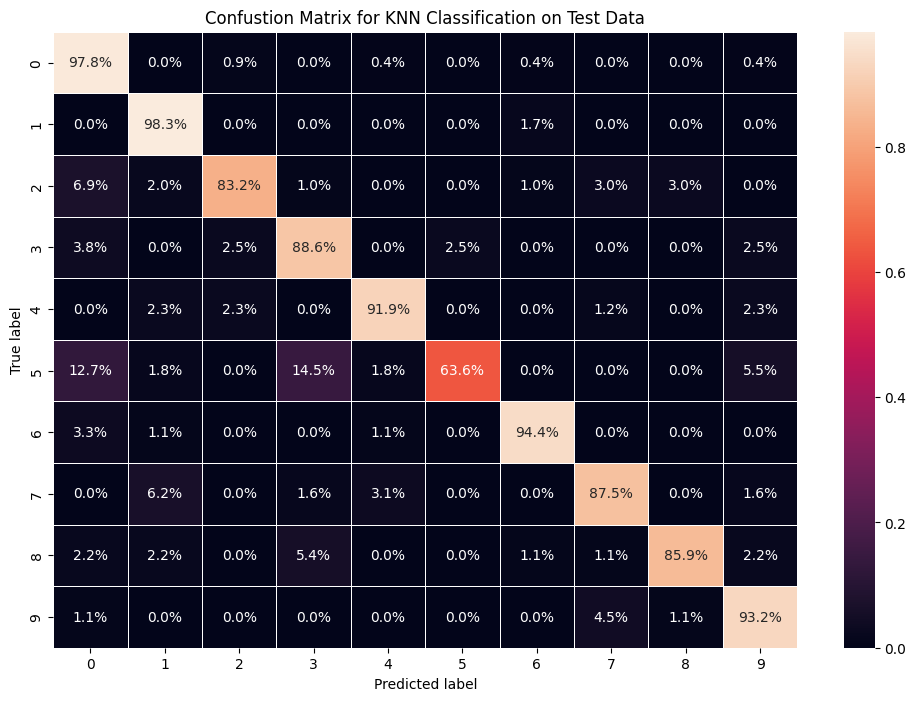

In [19]:
#Part 1 Problem 4
# Based on example given in: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

centers = np.genfromtxt("cloud_centers.csv", delimiter=",")

# We only fit the KNN classifier with the training data.
neigh = KNeighborsClassifier()
neigh.fit(train_in, train_out)

KNN_train_classification = []
for number in train_in:
    KNN_train_classification.append(neigh.predict([number])[0])

train_correct = np.where(KNN_train_classification == train_out)[0]
train_percentage = 100 * len(train_correct) / len(train_in)
print(f"{train_percentage:.2f}% from the train set is correctly classified using the K-Nearest-Neighbor method.")

KNN_test_classification = []
for number in test_in:
    KNN_test_classification.append(neigh.predict([number])[0])

test_correct = np.where(KNN_test_classification == test_out)[0]
test_percentage = 100 * len(test_correct) / len(test_in)
print(f"{test_percentage:.2f}% from the test set is correctly classified using the K-Nearest-Neighbor method.")

nearest_mean_train_classification = find_nearest_mean(train_in, centers)
nearest_mean_test_classification = find_nearest_mean(test_in, centers)

def plot_cf_matrix(ground_truth, prediction, title):
    cf_matrix = confusion_matrix(ground_truth, prediction)  # Ground truth values go first!
    cf_matrix = cf_matrix.astype(float)
    
    for i in range(cf_matrix.shape[0]):
        total = sum(cf_matrix[i, :])
        cf_matrix[i, :] = cf_matrix[i, :] / total
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt='.1%', linewidths=0.5)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_cf_matrix(train_out, nearest_mean_train_classification, "Confustion Matrix for NM Classification on Training Data")
plot_cf_matrix(train_out, KNN_train_classification, "Confustion Matrix for KNN Classification on Training Data")
plot_cf_matrix(test_out, nearest_mean_test_classification, "Confustion Matrix for NM Classification on Test Data")
plot_cf_matrix(test_out, KNN_test_classification, "Confustion Matrix for KNN Classification on Test Data")

plt.show()


In [18]:
#Part 2

# Here is our implementation of the multiclass perceptron:

import numpy as np
import math

train_in = np.genfromtxt("train_in.csv", delimiter=",")
train_out = np.genfromtxt("train_out.csv", delimiter=",")
test_in = np.genfromtxt("test_in.csv", delimiter=",")
test_out = np.genfromtxt("test_out.csv", delimiter=",")

bias = np.ones((len(train_in), 1))
T = np.append(train_in, bias, axis=1)

# Construct onehot matrix with a 1 in each row corresponding to the correct output of the training data.
onehots = np.zeros((len(train_in), 10))

for i in range(len(train_in)):
    j = int(train_out[i])
    onehots[i][j] = 1

def compute_softmaxes(W):
    softmaxes = np.zeros((len(train_in), 10))

    for i in range(len(train_in)):
        for k in range(10):
            softmaxes[i][k] = math.e ** np.dot(W[k], np.transpose(T[i]))

        softmaxes[i] /= sum(softmaxes[i])
    
    return softmaxes

def compute_gradients(i, softmaxes):
    gradients = np.zeros((10, 257))
    for k in range(10):
        gradients[k] = 2 * T[i] * (softmaxes[i][k] - onehots[i][k])

    return gradients

step_size = 1

# Initialise the weights matrix with random values between -0.5 and 0.5
W = np.random.rand(10, 257)
W = np.subtract(W, np.ones((10, 257)) / 2)

# Training loop with epochs
for epoch in range(200):
    softmaxes = compute_softmaxes(W)
    total_gradients = np.zeros((10, 257))
    for i in range(len(train_in)):
        total_gradients += compute_gradients(i, softmaxes)

    total_gradients = total_gradients / len(train_in)

    W -= total_gradients * step_size
    print("Loss: " + str(-sum(sum(onehots * np.log(softmaxes))) / len(train_in)))

results = np.zeros(len(train_in))

# Validate the results for the training data

for i in range(len(train_in)):
    output = np.argmax(np.dot(W, np.transpose(T[i])))
    if output == train_out[i]:
        results[i] = 1
    else:
        results[i] = 0

print("Correct results for the training set: ")
print(float(sum(results)) / len(train_in))


# Validate the results for the test data
results = np.zeros(len(test_in))

bias = np.ones((len(test_in), 1))
T = np.append(test_in, bias, axis=1)

for i in range(len(test_in)):
    output = np.argmax(np.dot(W, np.transpose(T[i])))
    if output == test_out[i]:
        results[i] = 1
    else:
        results[i] = 0

print("Correct results for the test set: ")
print(float(sum(results)) / len(test_in))

Loss: 7.12085434839645
Loss: 16.746991571304036
Loss: 28.740998726095334
Loss: 21.328109733136575
Loss: 11.784281548303543
Loss: 9.955259009571975
Loss: 6.833688979606007
Loss: 3.6744394105721025
Loss: 1.1533224164709721
Loss: 0.7964247176280818
Loss: 0.815744999025796
Loss: 1.0702647284198792
Loss: 1.199971592475334
Loss: 1.634653600937964
Loss: 0.7268969890770106
Loss: 0.6605991873108042
Loss: 0.5514303570769703
Loss: 0.5109805817545472
Loss: 0.4194627089321354
Loss: 0.36598546341414884
Loss: 0.2999419213272474
Loss: 0.2750450108231182
Loss: 0.25914277618846393
Loss: 0.24655303865410555
Loss: 0.23525329441455128
Loss: 0.22494931806471946
Loss: 0.21547500998218969
Loss: 0.20672147970875326
Loss: 0.19860345331975815
Loss: 0.1910519744054488
Loss: 0.18401021273515952
Loss: 0.17743164450888252
Loss: 0.17127798859569926
Loss: 0.1655168438488431
Loss: 0.160119336650718
Loss: 0.15505826063473788
Loss: 0.15030711588159096
Loss: 0.14583997896363776
Loss: 0.14163189442306792
Loss: 0.1376593989